## Titanic: Machine Learning from Disaster

This notebook contains the exploration of the passengers on Titanic and factors effecting it.

To start, let's load the dataset and understand various types of information available in the dataset's column.

In [82]:
import pandas as pd
train = pd.read_csv('train.csv')

print train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'], dtype='object')


#### Class
Does being in an upper class increase your chances or survival?

In [83]:
pclass = train.groupby('Pclass')
print pclass['Survived'].mean()

Pclass
1         0.629630
2         0.472826
3         0.242363
Name: Survived, dtype: float64


#### Gender
Are women more likely to survive and get rescued than men?

In [84]:
gender = train.groupby('Sex')
print gender["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Women are more likely to survive by about 56% more than men.

#### How both Gender and Class affect the survival rate?
From the two previous checks, we know that being rich as well as being a female positively affects the chances of survival. So richer female more likely to survive? By how much?

In [85]:
genderclass = train.groupby(['Sex','Pclass'])
print genderclass['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


We will now explore how survival and fare relate to each other

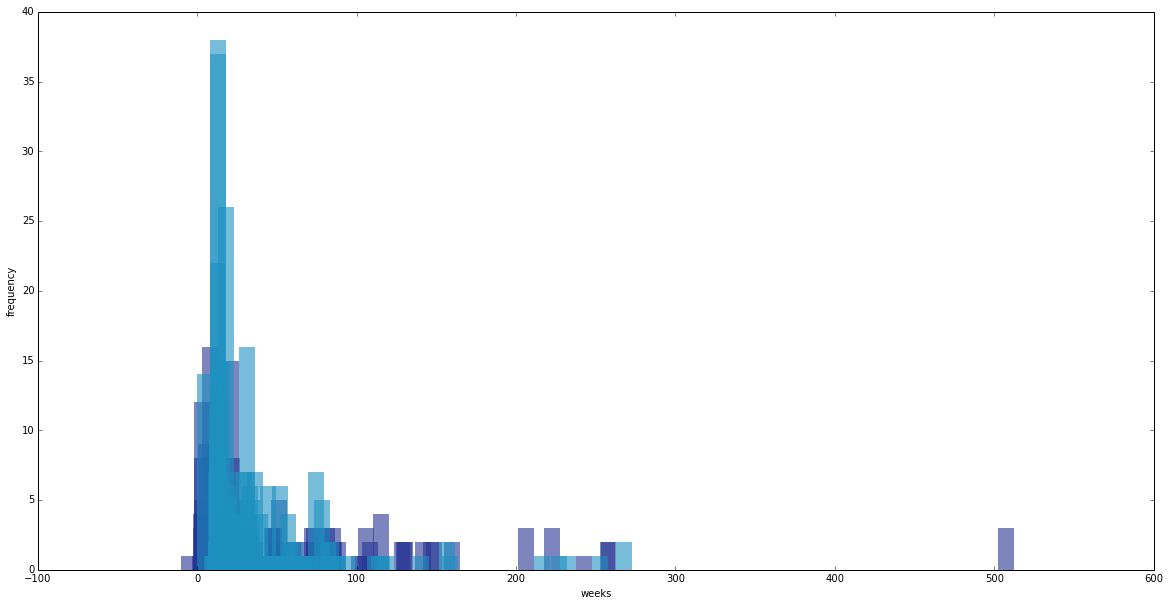

In [86]:
alive = train[train.Survived==1]
dead = train[train.Survived==0]

import thinkplot
import thinkstats2

alive_hist = thinkstats2.Hist(alive.Fare)
dead_hist = thinkstats2.Hist(dead.Fare)

width = 10
thinkplot.PrePlot(2)
thinkplot.figure(figsize=(20,10))
thinkplot.Hist(alive_hist, align='right', width=width)
thinkplot.Hist(dead_hist, align='left', width=width)
thinkplot.Show(xlabel='alive/dead', ylabel='frequency', figsize=(20,10))

Now, we will be looking at how the number of family members on board effect the fare they choose. Intuitively, I would say, if there are more family members, people tend to choose lower class/pay lower fare. Let's see. 

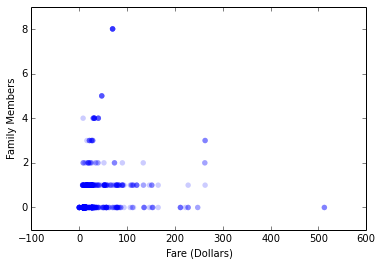

In [87]:
thinkplot.Scatter(train.Fare, train.SibSp)
thinkplot.Show(xlabel='Fare (Dollars)',
               ylabel='Family Members',
               )

As we can see, as the number of family members increase, the concentration of the scatterplot dots tend to go towards the lower end of the fare. There are some outliers, like those 2/3 family members paying approximately 250$.